In [ ]:
  from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abhaspastor","key":"***************"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

 86% 13.0M/15.1M [00:01<00:00, 14.0MB/s]
100% 15.1M/15.1M [00:01<00:00, 8.79MB/s]


In [ ]:
!unzip /content/brain-mri-images-for-brain-tumor-detection.zip

Archive:  /content/brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tum

In [ ]:
!rm -r /content/no /content/yes

In [ ]:
import numpy as np
import tensorflow as tf


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
dataset = tf.keras.utils.image_dataset_from_directory('/content/brain_tumor_dataset')

Found 253 files belonging to 2 classes.


In [ ]:
data_iterator = dataset.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
dataset = dataset.map(lambda x,y : (x/255,y))

In [ ]:
scaled_iterator = dataset.as_numpy_iterator()

In [ ]:
scaled_iterator.next()[0].min()

0.0

In [ ]:
len(dataset)

8

In [ ]:
train_size = int(len(dataset)*.7)
val_data = int(len(dataset)*.2)+1
test_data = int(len(dataset)*.1)+1

In [ ]:
train = dataset.take(train_size)
val = dataset.skip(train_size).take(val_data)
test = dataset.skip(train_size + val_data).take(test_data)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16,(3,3),1, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'adam',loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
log_dir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)

In [ ]:
hist = model.fit(train,epochs = 10,validation_data = val,callbacks = [tensorboard_callback])

Epoch 1/10
5/5 [==============================] - 14s 203ms/step - loss: 0.6877 - accuracy: 0.6313 - val_loss: 0.4749 - val_accuracy: 0.8438
Epoch 2/10
5/5 [==============================] - 1s 151ms/step - loss: 0.4904 - accuracy: 0.7875 - val_loss: 0.3443 - val_accuracy: 0.8906
Epoch 3/10
5/5 [==============================] - 2s 362ms/step - loss: 0.4515 - accuracy: 0.8250 - val_loss: 0.4038 - val_accuracy: 0.8281
Epoch 4/10
5/5 [==============================] - 2s 256ms/step - loss: 0.4119 - accuracy: 0.8375 - val_loss: 0.3959 - val_accuracy: 0.8594
Epoch 5/10
5/5 [==============================] - 1s 156ms/step - loss: 0.3377 - accuracy: 0.8562 - val_loss: 0.3011 - val_accuracy: 0.8906
Epoch 6/10
5/5 [==============================] - 1s 246ms/step - loss: 0.2740 - accuracy: 0.8750 - val_loss: 0.2166 - val_accuracy: 0.9688
Epoch 7/10
5/5 [==============================] - 2s 212ms/step - loss: 0.2126 - accuracy: 0.9250 - val_loss: 0.1695 - val_accuracy: 0.9375
Epoch 8/10
5/5 [===

In [ ]:
hist.history

{'loss': [0.6877036690711975,
  0.4904330372810364,
  0.4514818787574768,
  0.4119449555873871,
  0.3376917243003845,
  0.2739976644515991,
  0.21258608996868134,
  0.1476934552192688,
  0.09574846178293228,
  0.06517698615789413],
 'accuracy': [0.6312500238418579,
  0.7875000238418579,
  0.824999988079071,
  0.8374999761581421,
  0.856249988079071,
  0.875,
  0.925000011920929,
  0.949999988079071,
  0.96875,
  0.9937499761581421],
 'val_loss': [0.4749305546283722,
  0.34426063299179077,
  0.4037604331970215,
  0.39586567878723145,
  0.3010527491569519,
  0.21656334400177002,
  0.1695057898759842,
  0.062301840633153915,
  0.07544539123773575,
  0.020812660455703735],
 'val_accuracy': [0.84375,
  0.890625,
  0.828125,
  0.859375,
  0.890625,
  0.96875,
  0.9375,
  0.984375,
  1.0,
  1.0]}

[]

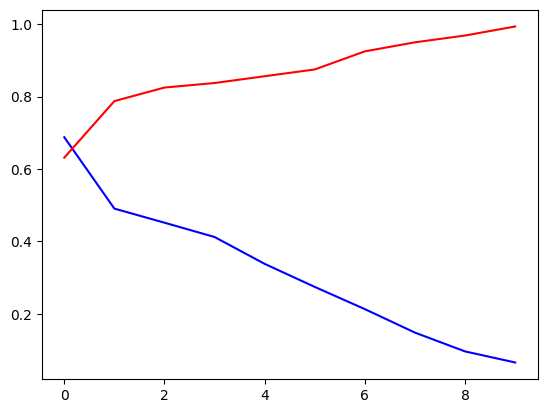

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'blue', label = 'Loss')
plt.plot(hist.history['accuracy'], color = 'red', label = 'Accuracy')
plt.plot()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
import cv2
import urllib
from urllib.request import urlopen

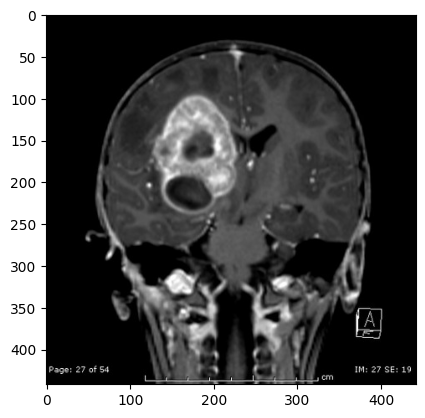

In [ ]:
img = cv2.imread('/content/79ca0e8f86b7c1fefaf360238a5cd0_gallery.jpeg')
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img,(256,256))

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))


1/1 [==============================] - 0s 18ms/step


In [ ]:
if yhat >= 0.5:
  print("Tumour Present")

if yhat < 0.5:
  print("No Tumour Present")

Tumour Present


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('my_model.h5')

In [ ]:
!cp /content/my_model.h5 /content/drive/MyDrive